## EN3160 Assignment 3 on Neural Networks
## Index No : 210212N
## Name : B.H.M.K.S.B.Herath
#### GitHub Link : https://github.com/shaveenherath/Machine_Vision/tree/main/Assignment%203


1. Listing 1 shows the code for a single dense layer network with manually computed forward path and backpropagations. 

   Do the following changes:
   
   - **(a)** Add a middle layer with 100 nodes and a sigmoid activation.
   - **(b)** Use cross-entropy loss (see slide 102).
   - **(c)** Run the network for 10 epochs and report the training and test accuracies.


### Network Architecture

- **Input Layer**:
  - Flattens the 32x32 RGB images into a vector of 3072 values (3 \* 32 \* 32).
  
- **Hidden Layer**:
  - Contains 100 neurons with a sigmoid activation function.
  - Introduces non-linearity, helping the model learn complex patterns.

- **Output Layer**:
  - Consists of 10 neurons, one per class, to provide class scores for CIFAR-10 classification.


100%|██████████| 170M/170M [05:08<00:00, 553kB/s]  


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch [1/10], Loss: 1.8429
Epoch [2/10], Loss: 1.6899
Epoch [3/10], Loss: 1.6246
Epoch [4/10], Loss: 1.5741
Epoch [5/10], Loss: 1.5291
Epoch [6/10], Loss: 1.4866
Epoch [7/10], Loss: 1.4498
Epoch [8/10], Loss: 1.4144
Epoch [9/10], Loss: 1.3819
Epoch [10/10], Loss: 1.3531


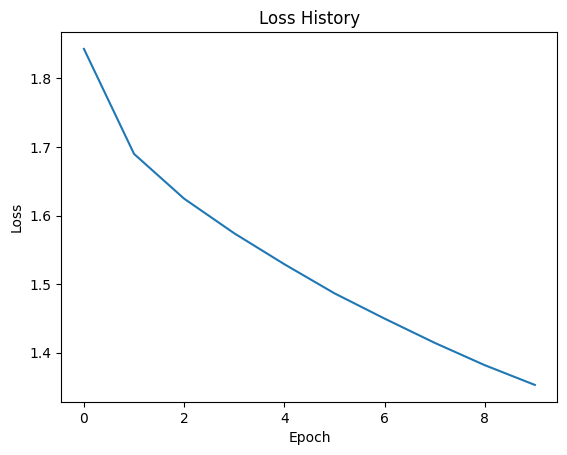

Training accuracy: 54.97%
Test accuracy: 48.03%


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# 2. Define Network with two dense layers
class DenseNet(nn.Module):
    def __init__(self):
        super(DenseNet, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 100)
        self.fc2 = nn.Linear(100, 10)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)  # Flatten input
        x = self.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

net = DenseNet()

# 3. Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# 4. Training the network
num_epochs = 10
loss_history = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    loss_history.append(running_loss / len(trainloader))
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(trainloader):.4f}")

# 5. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# 6. Calculate Training Accuracy
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 7. Calculate Test Accuracy
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()
test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


# Q2. 

2. Create a LeNet-5 network for MNIST using Pytorch. Report the training and test accuracies after 10 epochs.

#### Define Data Transform and Loaders

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


###  Define the LeNet-5 Network

#### Input Layer:
- **Input Dimensions**: 1x28x28 (grayscale MNIST images)
- **Operation**: Each image is passed through the convolutional layers.

#### Convolutional and Pooling Layers:
- **Conv Layer 1**: 6 filters, kernel size 5x5, stride 1
  - **Output size**: 6x24x24 (after applying 5x5 convolution on 28x28 input)
- **Pooling Layer 1**: 2x2 max pooling with stride 2
  - **Output size**: 6x12x12
- **Conv Layer 2**: 16 filters, kernel size 5x5, stride 1
  - **Output size**: 16x8x8
- **Pooling Layer 2**: 2x2 max pooling with stride 2
  - **Output size**: 16x4x4

#### Flatten Layer:
- **Input to Fully Connected Layers**: The 3D output from the final pooling layer (16x4x4) is flattened to a 1D vector of 256 values (16 * 4 * 4 = 256).

#### Fully Connected (Hidden) Layers:
- **Fully Connected Layer 1**: 120 neurons
  - Receives the 256-dimensional flattened vector and produces an output of 120 features.
- **Fully Connected Layer 2**: 84 neurons
  - Takes the 120-dimensional input and reduces it to 84 features.

#### Output Layer:
- **Fully Connected Layer 3 (Output)**: 10 neurons (one per class for MNIST)
  - Provides the final output scores for the 10 MNIST classes.


In [4]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = LeNet5()

Define Loss Function and Optimizer

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)


Training Loop

In [7]:
lossHistory = []
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(trainloader)}")
    lossHistory.append(running_loss / len(trainloader))


Epoch 1, Loss: 0.23532369187218882
Epoch 2, Loss: 0.06386580101838872
Epoch 3, Loss: 0.04657232290881473
Epoch 4, Loss: 0.03654000112903677
Epoch 5, Loss: 0.031129568397569637
Epoch 6, Loss: 0.026839938895307235
Epoch 7, Loss: 0.021913341775456237
Epoch 8, Loss: 0.020185577977563318
Epoch 9, Loss: 0.016372552124862143
Epoch 10, Loss: 0.015238860584594262


Calculate Accuracy

In [8]:
def calculate_accuracy(loader, model):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in loader:
            inputs, labels = data
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

print(f"Training Accuracy: {calculate_accuracy(trainloader, net)}%")
print(f"Test Accuracy: {calculate_accuracy(testloader, net)}%")


Training Accuracy: 99.50833333333334%
Test Accuracy: 98.89%


Plot Training Loss

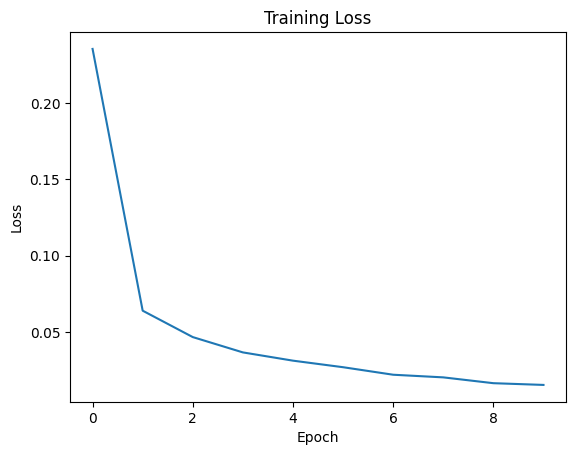

In [9]:
plt.plot(lossHistory)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()


### Q3.


### 3. Based on the PyTorch tutorial on transfer learning, get the pre-trained ResNet18 network trained on ImageNet1K to classify the Hymenoptera dataset by:
- (a) Fine-tuning the model
- (b) Using the network as a feature extractor

Report the results.


### 1. Download and Extract the Hymenoptera Dataset


In [10]:
url = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"
data_dir = "data_3/hymenoptera_data"  # Target directory for dataset

# Download and extract the dataset
download_and_extract_archive(url, download_root='data_3', extract_root='data_3', filename='hymenoptera_data.zip')


100%|██████████| 47.3M/47.3M [03:21<00:00, 235kB/s] 


Extracting data_3\hymenoptera_data.zip to data_3


### 2. Data Preprocessing and Dataloaders


In [12]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


### 3. Fine-Tuning the ResNet18 Model


In [13]:
# Load pretrained model
model_ft = models.resnet18(pretrained=True)

# Modify the final layer to match the number of classes
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Learning rate scheduler
from torch.optim import lr_scheduler
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)


c:\Python312\cv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Python312\cv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Dell/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [03:36<00:00, 216kB/s] 


### 4. Train the Fine-Tuned Model


In [14]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward pass
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward pass + optimize only in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model

# Train the fine-tuned model
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=10)


Epoch 0/9
----------
train Loss: 0.6023 Acc: 0.6844
val Loss: 0.2847 Acc: 0.8758

Epoch 1/9
----------
train Loss: 0.5758 Acc: 0.7828
val Loss: 0.1862 Acc: 0.9216

Epoch 2/9
----------
train Loss: 0.4401 Acc: 0.8074
val Loss: 0.3240 Acc: 0.8693

Epoch 3/9
----------
train Loss: 0.5808 Acc: 0.8320
val Loss: 0.2213 Acc: 0.9150

Epoch 4/9
----------
train Loss: 0.5342 Acc: 0.7664
val Loss: 0.2323 Acc: 0.9216

Epoch 5/9
----------
train Loss: 0.5811 Acc: 0.7705
val Loss: 0.3189 Acc: 0.8627

Epoch 6/9
----------
train Loss: 0.5221 Acc: 0.8197
val Loss: 0.1421 Acc: 0.9346

Epoch 7/9
----------
train Loss: 0.3665 Acc: 0.8443
val Loss: 0.1442 Acc: 0.9346

Epoch 8/9
----------
train Loss: 0.2975 Acc: 0.8525
val Loss: 0.1840 Acc: 0.9150

Epoch 9/9
----------
train Loss: 0.3185 Acc: 0.8607
val Loss: 0.1491 Acc: 0.9477

Training complete in 7m 5s
Best val Acc: 0.9477


### 5. Feature Extraction Using Pretrained Model


In [15]:
# Load pretrained model
model_conv = models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Replace the final layer
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, len(class_names))
model_conv = model_conv.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Train the feature extractor
model_conv = train_model(model_conv, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=10)


Epoch 0/9
----------
train Loss: 0.6306 Acc: 0.6762
val Loss: 0.3093 Acc: 0.8627

Epoch 1/9
----------
train Loss: 0.6121 Acc: 0.7254
val Loss: 0.3536 Acc: 0.8366

Epoch 2/9
----------
train Loss: 0.4743 Acc: 0.8156
val Loss: 0.2327 Acc: 0.9020

Epoch 3/9
----------
train Loss: 0.3658 Acc: 0.8238
val Loss: 0.1948 Acc: 0.9477

Epoch 4/9
----------
train Loss: 0.3878 Acc: 0.8402
val Loss: 0.2167 Acc: 0.9216

Epoch 5/9
----------
train Loss: 0.3488 Acc: 0.8238
val Loss: 0.1836 Acc: 0.9412

Epoch 6/9
----------
train Loss: 0.3695 Acc: 0.8484
val Loss: 0.2048 Acc: 0.9346

Epoch 7/9
----------
train Loss: 0.4782 Acc: 0.7992
val Loss: 0.1837 Acc: 0.9281

Epoch 8/9
----------
train Loss: 0.4162 Acc: 0.8197
val Loss: 0.1857 Acc: 0.9542

Epoch 9/9
----------
train Loss: 0.5264 Acc: 0.7951
val Loss: 0.4089 Acc: 0.8627

Training complete in 4m 57s
Best val Acc: 0.9542


### 6. Evaluate and Report Results


In [16]:
# Evaluate the fine-tuned model
def evaluate_model(model, dataloaders, phase='val'):
    model.eval()
    corrects = 0
    with torch.no_grad():
        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            corrects += torch.sum(preds == labels.data)
    accuracy = corrects.double() / dataset_sizes[phase]
    print(f'{phase} Accuracy: {accuracy:.4f}')

print("Fine-tuned Model Results:")
evaluate_model(model_ft, dataloaders)

print("\nFeature Extractor Model Results:")
evaluate_model(model_conv, dataloaders)


Fine-tuned Model Results:
val Accuracy: 0.9477

Feature Extractor Model Results:
val Accuracy: 0.9542



- **Fine-tuned Model** achieved **94.77%** validation accuracy, where all layers of ResNet18 were updated during training.
- **Feature Extractor Model** achieved **95.42%** validation accuracy, where only the final fully connected layers were trained, and the rest of the model’s weights were frozen.


- **Feature extraction** slightly outperformed fine-tuning in this case, showing better performance and being more efficient for smaller datasets like Hymenoptera, as it avoids overfitting and leverages pre-trained features effectively.
